## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [4]:
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Prediction
1985-03,7.209340,-1.277433,-4.327074,0.744988,-0.531027,1.004126,-0.851989,0.255075,0.567930,0.358221,0.249011,-0.825895,-0.529244,-0.904615,0.108156,13.035309
1985-06,6.893940,-1.709273,-4.122886,0.839108,-0.084579,0.662230,-0.702346,0.412531,0.417298,0.335329,0.320465,-0.796355,-0.511677,-0.911772,0.053614,13.160484
1985-09,6.840612,-1.861249,-4.010557,0.853306,0.313719,0.373128,-0.606786,0.467951,0.294372,0.336179,0.442101,-0.763784,-0.365508,-1.040820,-0.006936,16.657703
1985-12,6.474170,-2.301664,-2.786799,0.813373,1.078394,-1.110566,0.165312,-0.661390,-0.011733,-1.538154,-1.748788,1.511953,2.094579,-2.148002,-0.488341,16.345213
1986-03,6.984757,-1.078512,-4.273619,0.965144,-0.481375,0.769691,-0.759288,0.313615,0.691866,0.534520,0.258234,-0.727637,-0.601165,-0.645276,0.301987,15.921562
1986-06,6.703357,-1.475482,-3.981249,1.041278,-0.050192,0.376266,-0.612618,0.401608,0.572831,0.521254,0.353652,-0.733017,-0.598664,-0.624598,0.291843,14.741072
1986-09,6.839550,-1.464323,-3.825255,1.003054,0.289928,0.137663,-0.445792,0.370006,0.541914,0.320909,0.680234,-0.660708,-0.283203,-0.492592,0.178491,13.267827
1986-12,6.667392,-1.620497,-2.577314,0.870116,1.241689,-1.467642,0.361518,-0.952107,0.198746,-1.781227,-1.992376,1.711574,2.398984,-1.761953,-0.342443,16.734827
1987-03,7.198027,-0.659948,-4.445436,0.929271,-0.476685,0.859010,-0.458682,0.259011,0.669047,0.543142,0.410577,-0.547864,-0.410874,-0.329028,0.352228,18.234604
1987-06,6.837969,-1.090749,-4.256983,1.012418,-0.040583,0.573919,-0.306082,0.369929,0.533837,0.619256,0.635799,-0.499934,-0.381354,-0.416362,0.341966,17.033018


## 2.1 No scaled y dataset evaluation

In [3]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
rf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021), n_jobs=-1, cv=cv,
                  param_grid = {
                        'n_estimators': [10, 20, 30, 40, 50, 100],
                        'max_depth': [3, None],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'oob_score': [True, False],
                        'min_samples_leaf': [1,2,3,4],
                      },
                  scoring='neg_root_mean_squared_error'
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,rf,scaling=False))

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100, 'oob_score': True}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_PCA_dataset.csv', PATH, rf, cv=cv, scaling=False)

## 2.2 Scaled y dataset evaluation

In [4]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
rf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021), n_jobs=-1, cv=cv,
                  param_grid = {
                        'n_estimators': [10, 20, 30, 40, 50, 100],
                        'max_depth': [3, None],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'oob_score': [True, False],
                        'min_samples_leaf': [1,2,3,4],
                      },
                  scoring='neg_root_mean_squared_error'
)
data = pd.read_csv(PATH+'IBM_PCA_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,rf,scaling=True))

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_PCA_dataset.csv', PATH, rf, cv=cv, scaling=True)

## 3.0 Model testing settings

In [6]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_PCA_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

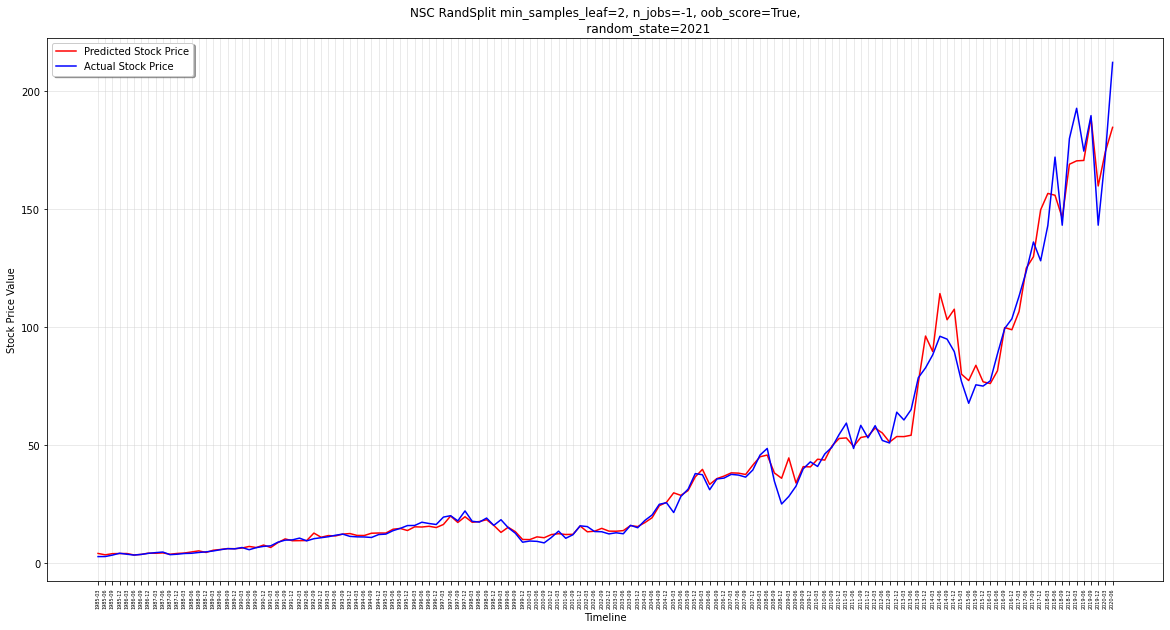

NSC MODEL RESULTS
 RMSE
 	Test: 6.885693873377937
 MAPE
 	Test: 0.13850250474465328
 MAE
 	Test: 4.129787963700349
 R2 Score Adj
 	Test: 0.949423099003189



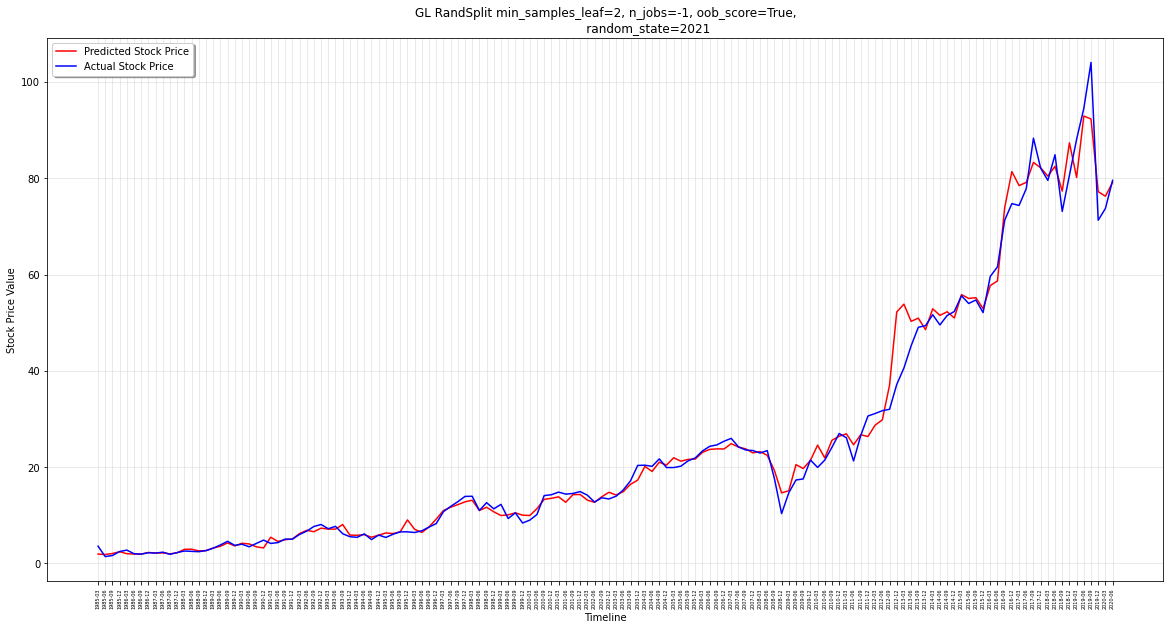

GL MODEL RESULTS
 RMSE
 	Test: 4.57674007254888
 MAPE
 	Test: 0.16080626880314355
 MAE
 	Test: 2.696928435946136
 R2 Score Adj
 	Test: 0.9241815746671522



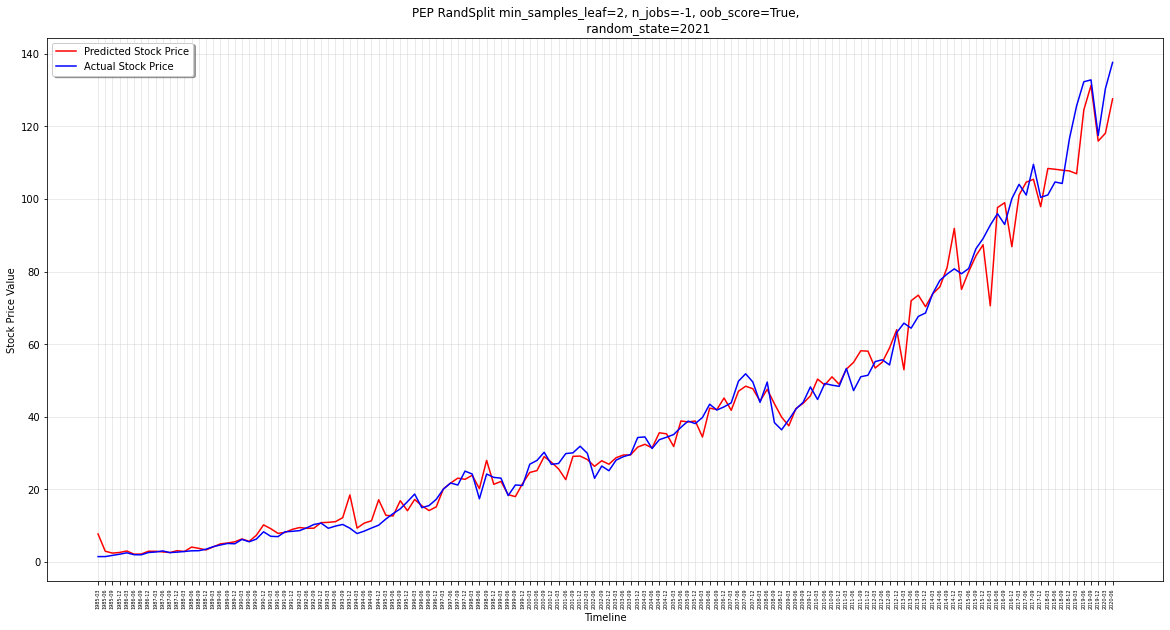

PEP MODEL RESULTS
 RMSE
 	Test: 6.218985923308481
 MAPE
 	Test: 0.3101154090723621
 MAE
 	Test: 4.1939774006481185
 R2 Score Adj
 	Test: 0.9267885540985905



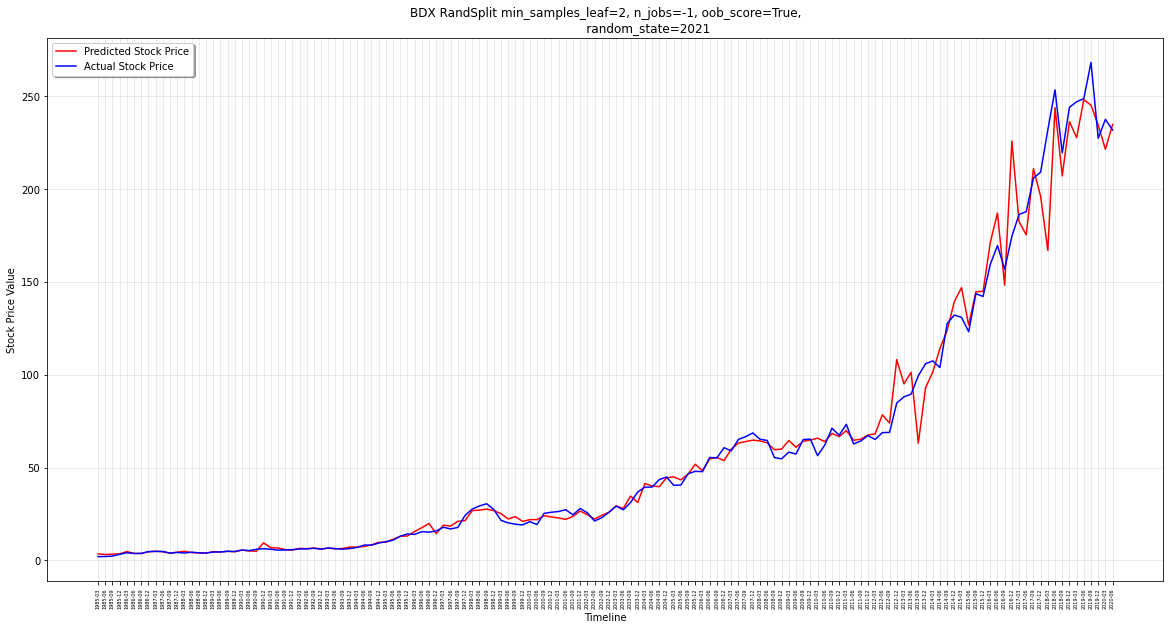

BDX MODEL RESULTS
 RMSE
 	Test: 18.14654799053878
 MAPE
 	Test: 0.19289312286438348
 MAE
 	Test: 9.14549149689227
 R2 Score Adj
 	Test: 0.8359156566653925



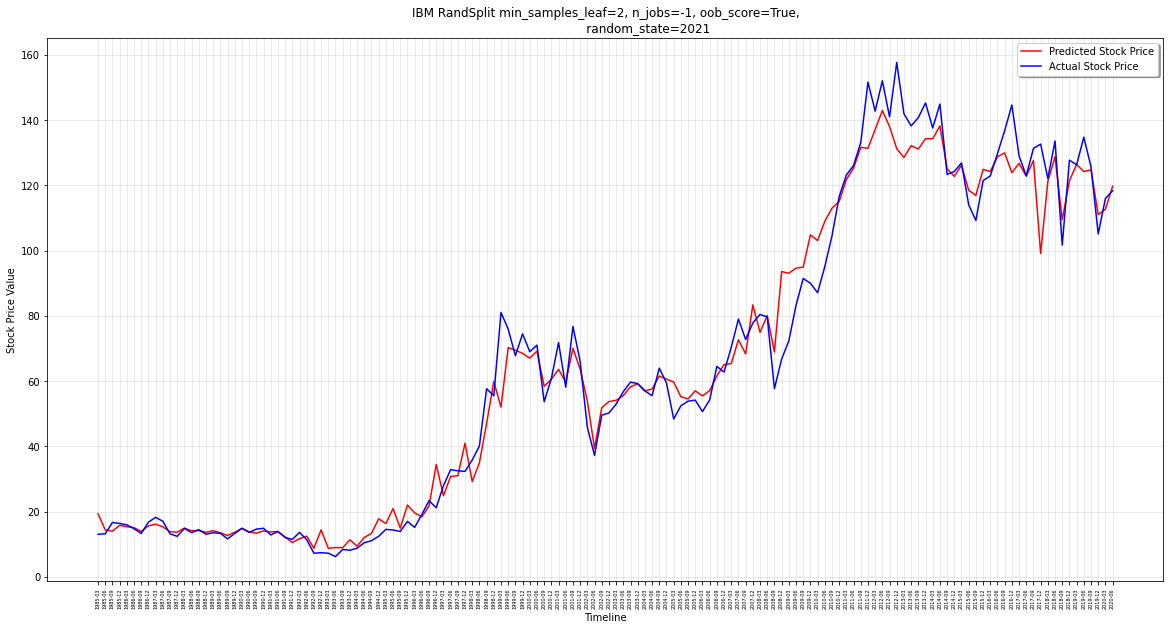

IBM MODEL RESULTS
 RMSE
 	Test: 11.22455899645438
 MAPE
 	Test: 0.13222065319475787
 MAE
 	Test: 7.216513666587219
 R2 Score Adj
 	Test: 0.9084064508645334



In [7]:
from lib.fundamental_lib import model_results_revised
#Best Params
Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], rf, label=stock, scaling=False)

## 3.2 Random split - Scaled prediction variable

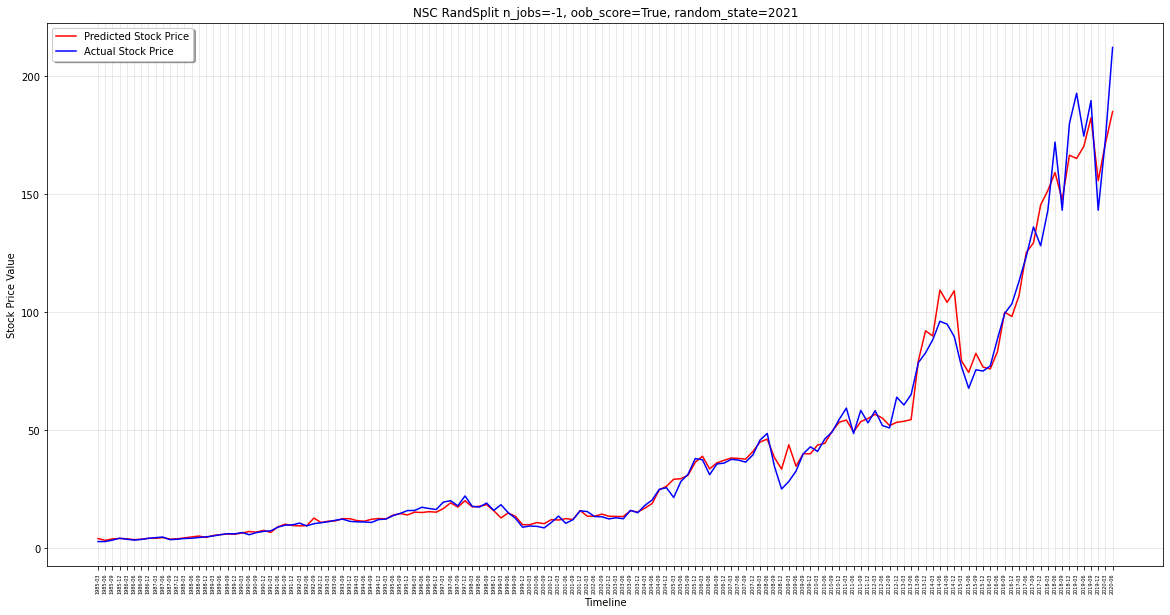

NSC MODEL RESULTS
 RMSE
 	Test: 7.200349350319752
 MAPE
 	Test: 0.13847775309152177
 MAE
 	Test: 4.139823898035907
 R2 Score Adj
 	Test: 0.9446950593965924



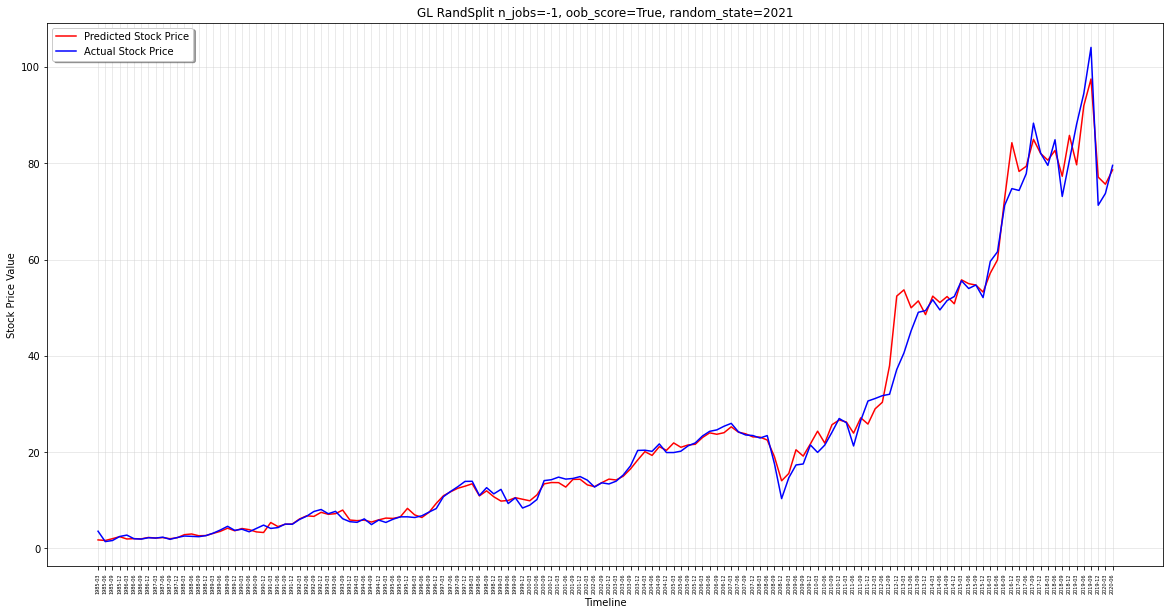

GL MODEL RESULTS
 RMSE
 	Test: 4.794760871594794
 MAPE
 	Test: 0.16401890555752388
 MAE
 	Test: 2.855782755161153
 R2 Score Adj
 	Test: 0.9167860439664951



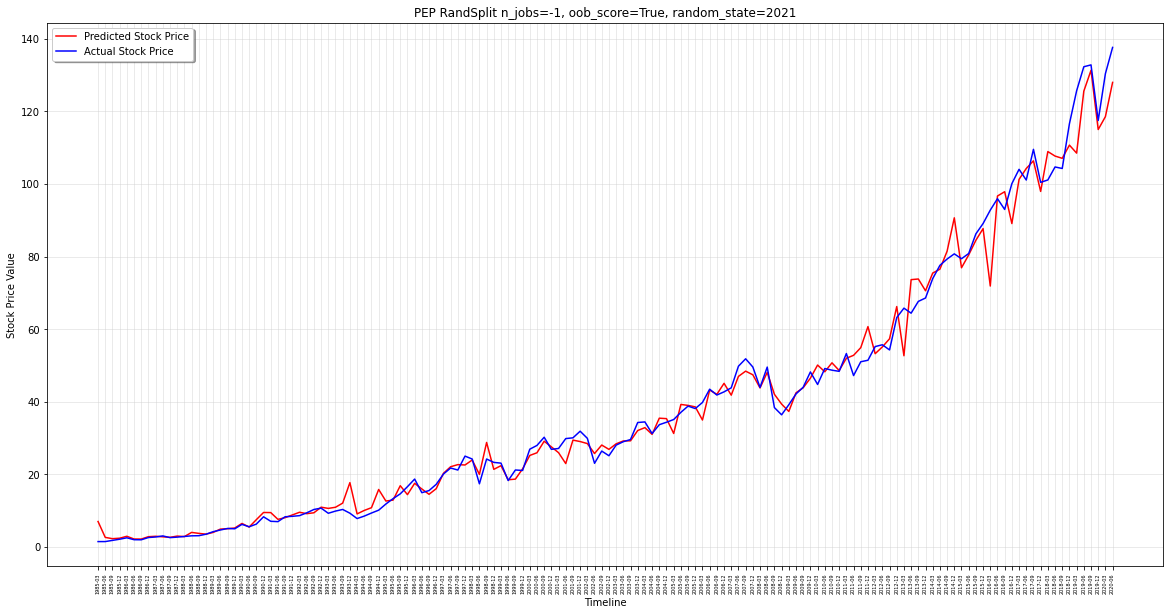

PEP MODEL RESULTS
 RMSE
 	Test: 6.109069312108591
 MAPE
 	Test: 0.2874723731423887
 MAE
 	Test: 4.2447596763742395
 R2 Score Adj
 	Test: 0.9293536153398891



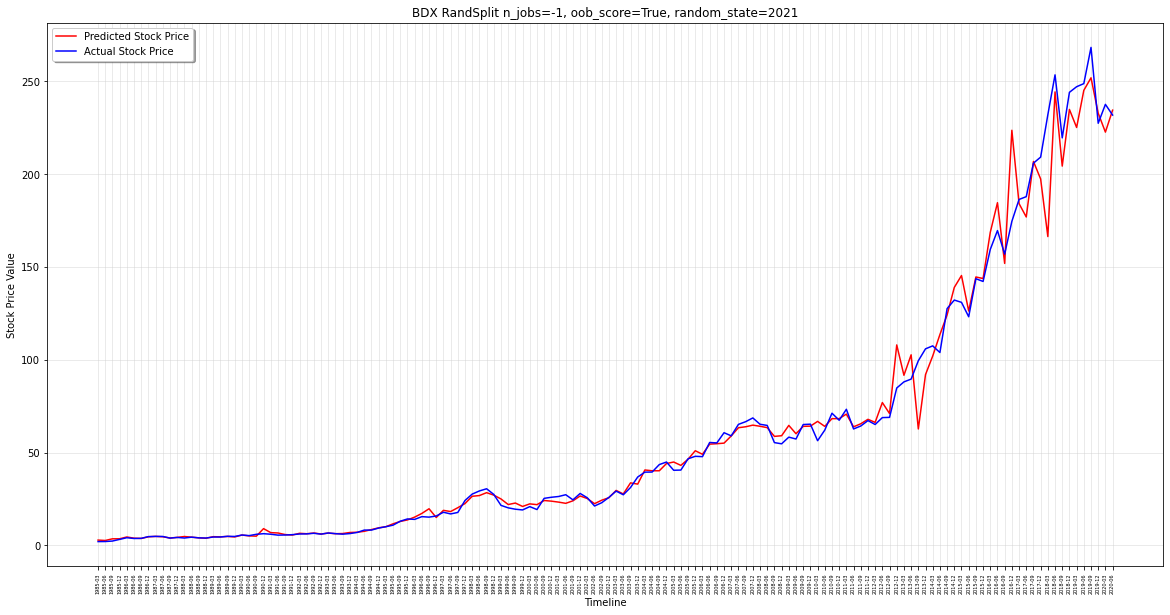

BDX MODEL RESULTS
 RMSE
 	Test: 18.12285967367024
 MAPE
 	Test: 0.17192839505297258
 MAE
 	Test: 9.03022344128838
 R2 Score Adj
 	Test: 0.8363437650827386



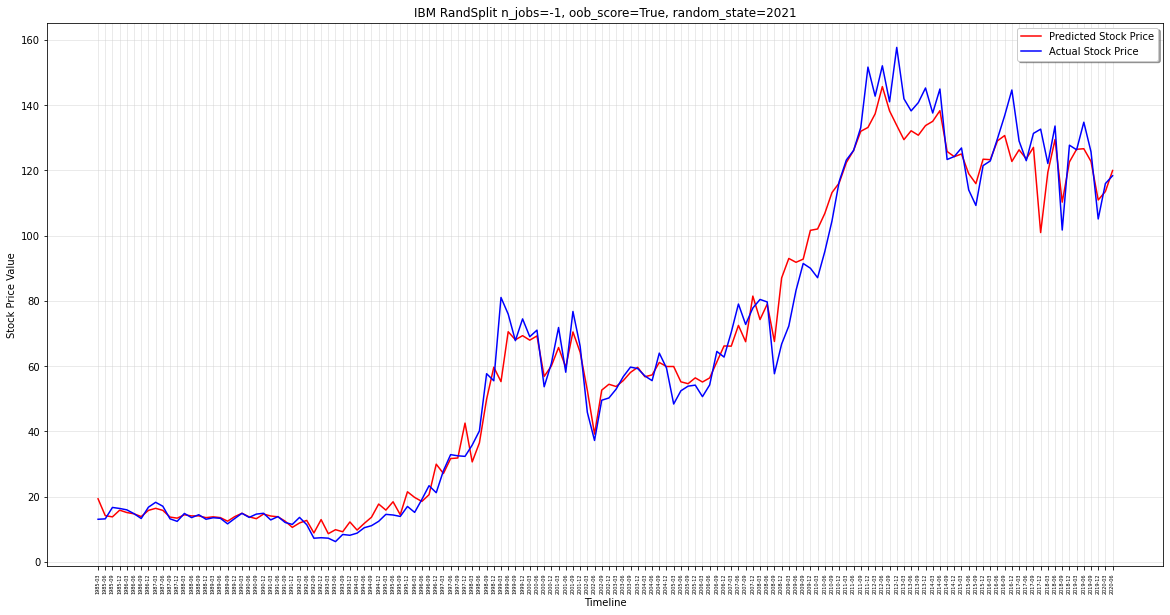

IBM MODEL RESULTS
 RMSE
 	Test: 10.621132359806522
 MAPE
 	Test: 0.13649294446165114
 MAE
 	Test: 7.021067125386209
 R2 Score Adj
 	Test: 0.9179897839780528



In [8]:
from lib.fundamental_lib import model_results_revised
#Best Params
Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], rf, label=stock, scaling=True)

## 3.3 Sequential split - No scaled prediction variable

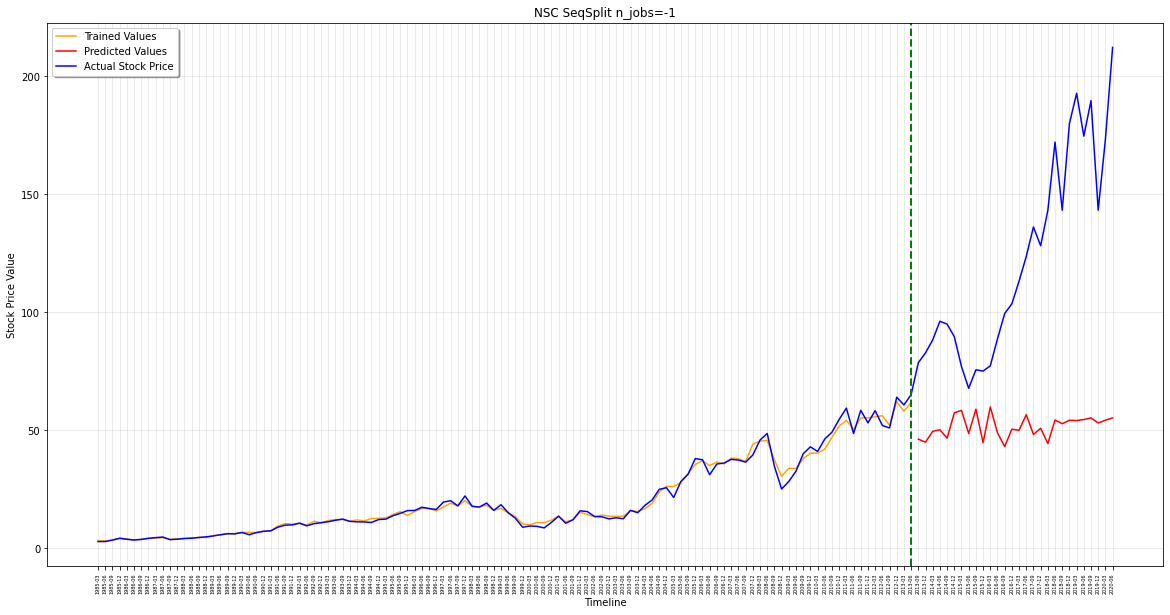

NSC MODEL RESULTS
 RMSE
 	Train: 1.6983096562483841
 	Test: 87.10554985276084
 	Dataset: 39.25554905212587
 MAPE
 	Train: 0.05184426257040344
 	Test: 0.5357312012191455
 	Dataset: 0.14997518019847
 R2 Score Adj
 	Train: 0.9878743866736721
 	Test: -6.5011839639312905
 	Dataset: 0.29649345144200034



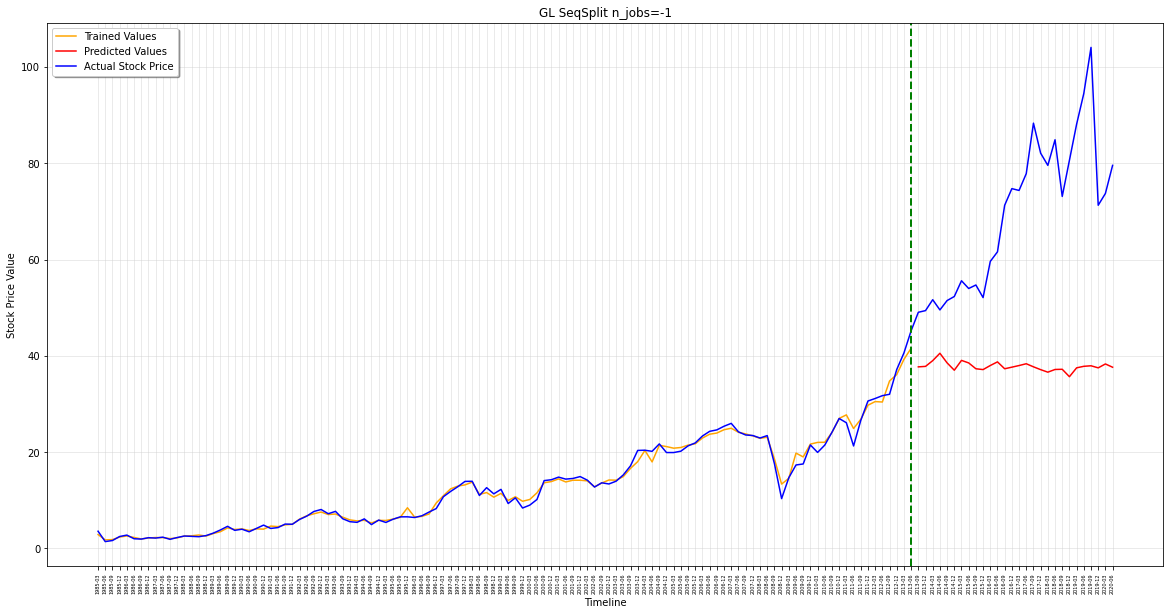

GL MODEL RESULTS
 RMSE
 	Train: 0.9462647069293918
 	Test: 36.08113610605598
 	Dataset: 16.2703730544877
 MAPE
 	Train: 0.054939132520544304
 	Test: 0.43067901015364857
 	Dataset: 0.13113812868390112
 R2 Score Adj
 	Train: 0.9885196802119701
 	Test: -10.263692180473035
 	Dataset: 0.5412757688263667



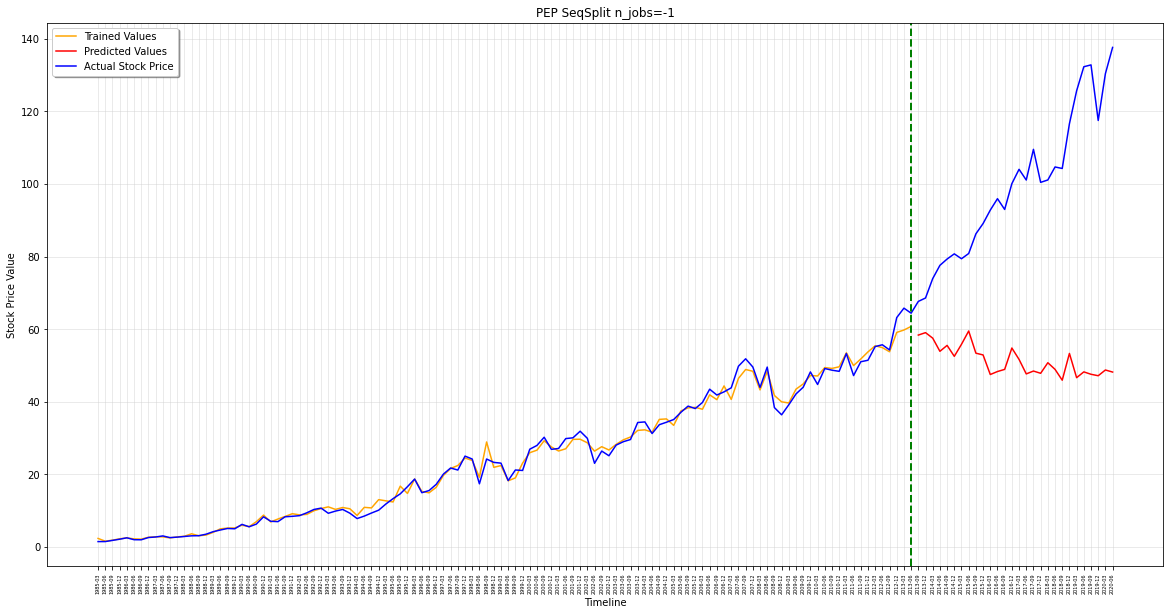

PEP MODEL RESULTS
 RMSE
 	Train: 1.581580022177193
 	Test: 55.507080078479405
 	Dataset: 25.03636534118463
 MAPE
 	Train: 0.05934574659907463
 	Test: 0.46270410764988806
 	Dataset: 0.1411456939450438
 R2 Score Adj
 	Train: 0.9907805894980558
 	Test: -13.4783397450043
 	Dataset: 0.4553108723444932



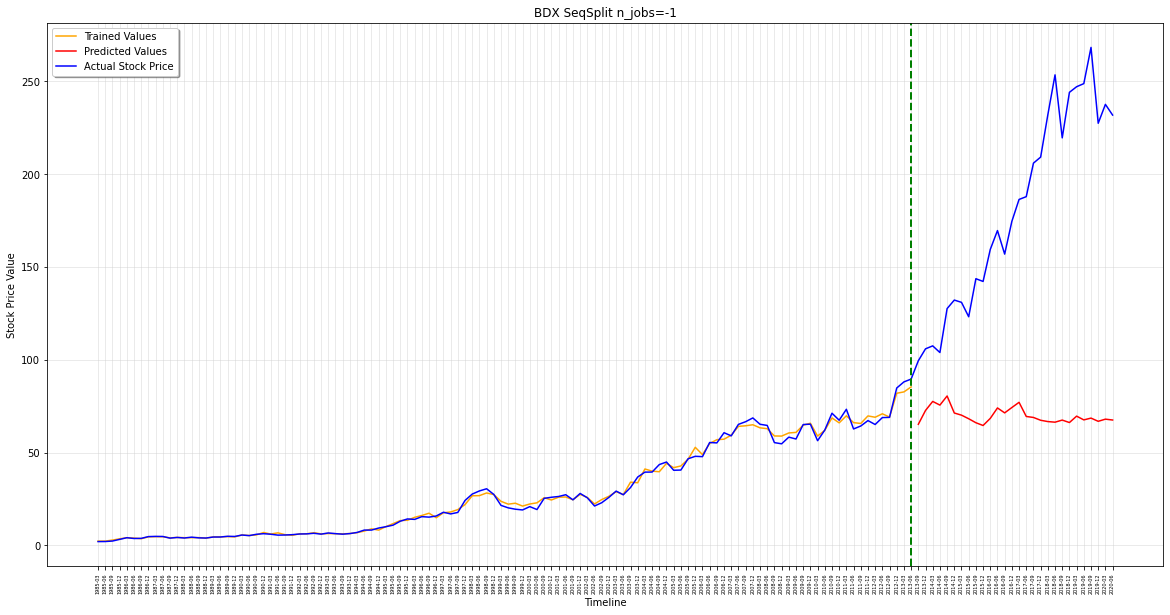

BDX MODEL RESULTS
 RMSE
 	Train: 1.7809840109249788
 	Test: 126.52460066482698
 	Dataset: 57.00002206414746
 MAPE
 	Train: 0.049070653990189506
 	Test: 0.5785617397881296
 	Dataset: 0.15644996509606546
 R2 Score Adj
 	Train: 0.9939887284515583
 	Test: -11.138917468165689
 	Dataset: 0.26270876236900453



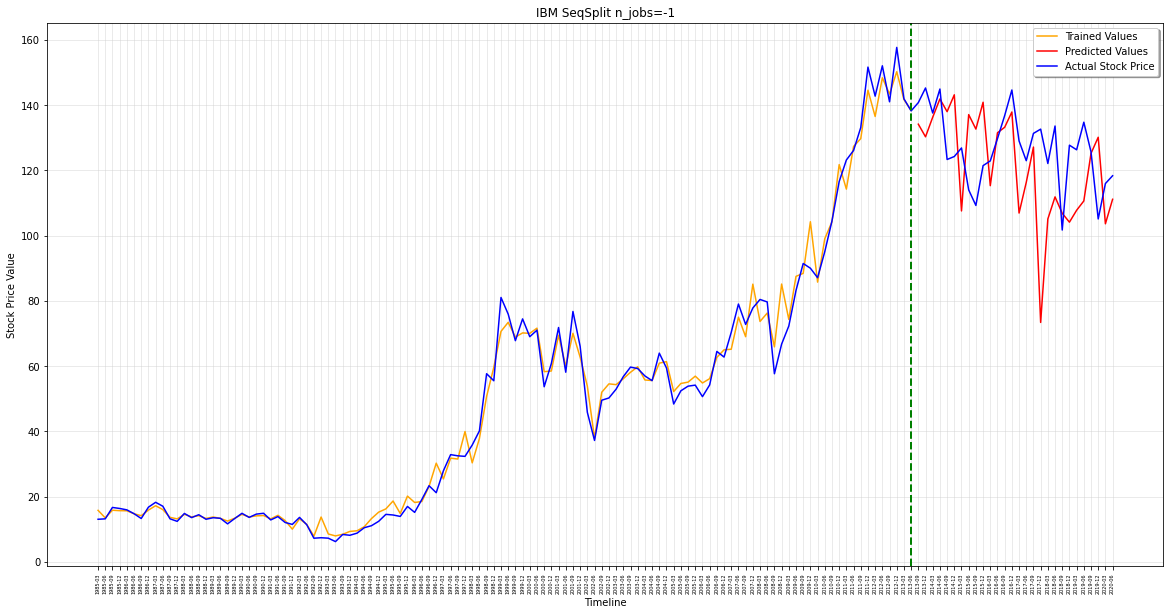

IBM MODEL RESULTS
 RMSE
 	Train: 4.056512806724389
 	Test: 18.883086585802168
 	Dataset: 9.24282430893221
 MAPE
 	Train: 0.0737460994229657
 	Test: 0.11941761230096977
 	Dataset: 0.08300815448214136
 R2 Score Adj
 	Train: 0.9877404409373157
 	Test: -5.446972538530304
 	Dataset: 0.9571030318391396



In [12]:
from lib.fundamental_lib import model_results_seq
#Best Params
Params={'max_features': 'auto', 'n_estimators': 100}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, rf, label=stock, scaling=False)

## 3.4 Sequential split - Scaled prediction variable

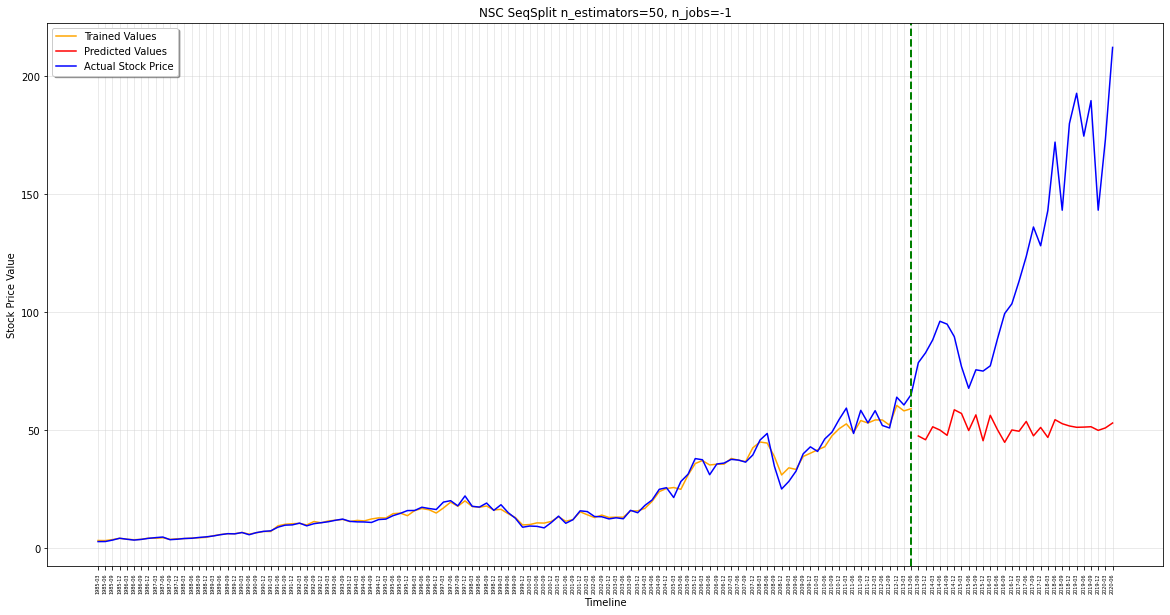

NSC MODEL RESULTS
 RMSE
 	Train: 1.8450476582057111
 	Test: 88.06021253181125
 	Dataset: 39.690367047606664
 MAPE
 	Train: 0.05048019559694822
 	Test: 0.5387651784969014
 	Dataset: 0.1495030242969387
 R2 Score Adj
 	Train: 0.9856885006794859
 	Test: -6.666508507310358
 	Dataset: 0.28082221689499154



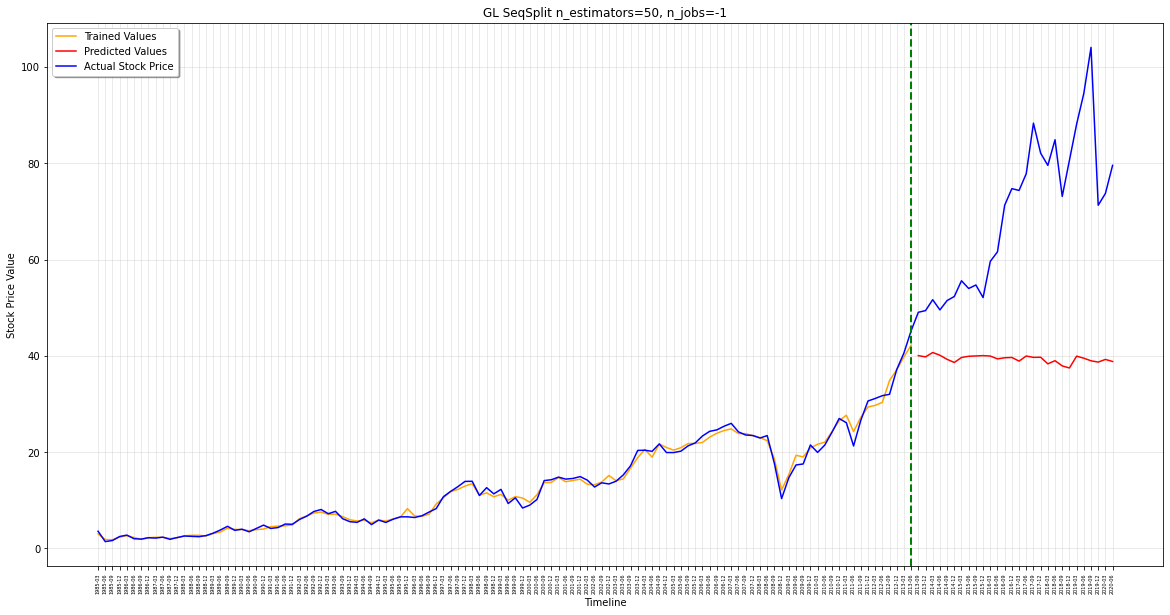

GL MODEL RESULTS
 RMSE
 	Train: 0.8757966106312617
 	Test: 34.713634756265265
 	Dataset: 15.6521400819905
 MAPE
 	Train: 0.05610340244269681
 	Test: 0.4077012319235148
 	Dataset: 0.12740645877097462
 R2 Score Adj
 	Train: 0.9901658863934298
 	Test: -9.426067800306615
 	Dataset: 0.5754741775174159



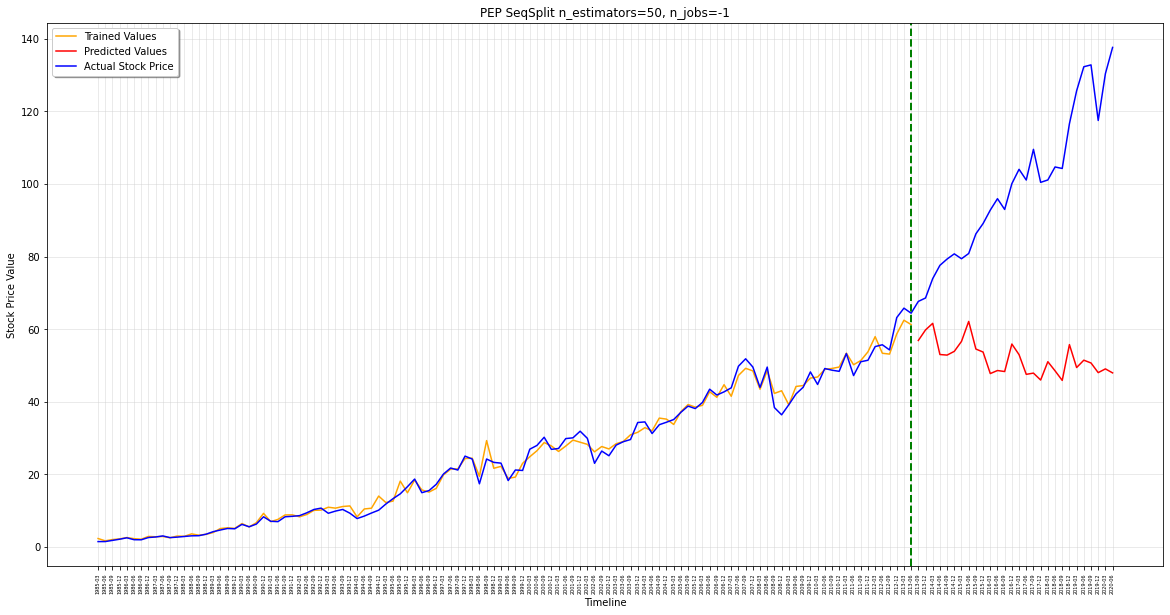

PEP MODEL RESULTS
 RMSE
 	Train: 1.6832516855963555
 	Test: 54.8284244977253
 	Dataset: 24.736588255010822
 MAPE
 	Train: 0.06563485615777478
 	Test: 0.45656562505577114
 	Dataset: 0.1449145225776481
 R2 Score Adj
 	Train: 0.9895571526961188
 	Test: -13.126466124604576
 	Dataset: 0.46827663277944453



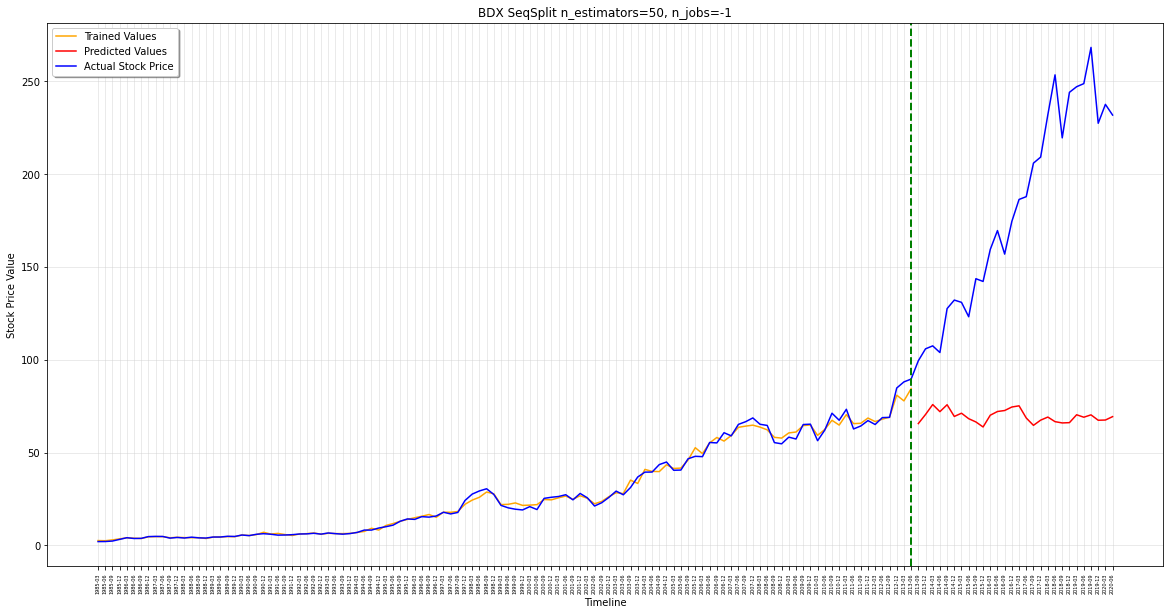

BDX MODEL RESULTS
 RMSE
 	Train: 1.985665243549882
 	Test: 126.52622418086712
 	Dataset: 57.00614391712655
 MAPE
 	Train: 0.05076947341738229
 	Test: 0.582293251155587
 	Dataset: 0.15856100876289245
 R2 Score Adj
 	Train: 0.9925276298984855
 	Test: -11.139228994201842
 	Dataset: 0.26255038239728523



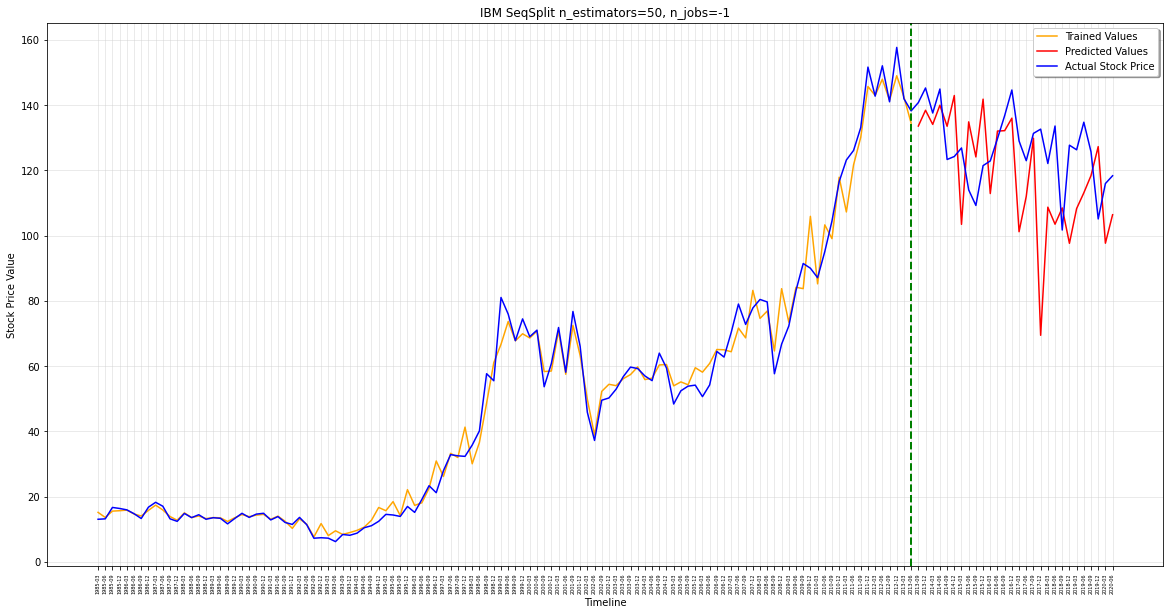

IBM MODEL RESULTS
 RMSE
 	Train: 4.528286717254408
 	Test: 20.17653310731431
 	Dataset: 9.94505729796891
 MAPE
 	Train: 0.07441425769259685
 	Test: 0.12841095330756253
 	Dataset: 0.08536463652360385
 R2 Score Adj
 	Train: 0.9847230385778422
 	Test: -6.360425816992936
 	Dataset: 0.9503371336172077



In [13]:
from lib.fundamental_lib import model_results_seq
#Best Params
Params={'max_features': 'auto', 'n_estimators': 50}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_PCA_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, rf, label=stock, scaling=True)